Exploratory Data Analysis: Data Pre-processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv('Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [3]:
df.shape

(20000, 11)

In [4]:
df.isnull().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [5]:
# keep only the required columns
df = df[['post_text']]
df.head()

,post_text
0,It's just over 2 years since I was diagnosed w...
1,"It's Sunday, I need a break, so I'm planning t..."
2,Awake but tired. I need to sleep but my brain ...
3,RT @SewHQ: #Retro bears make perfect gifts and...
4,It’s hard to say whether packing lists are mak...


In [6]:
df.describe()

,post_text
count,20000
unique,19488
top,Oh crap! It's a trap! Aleph took damage.
freq,15


In [7]:
df.shape

(20000, 1)

Text cleaning

In [8]:
# Change all characters in tweets to lower case
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove numbers from tweets
df["post_text"] = df["post_text"].str.replace("\d","")

# Remove punctuation from tweets
df["post_text"] = df["post_text"].str.replace("[^\w\s]","")

In [9]:
#!pip install textblob
#!pip install nltk 

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [ ]:
# Remove stop words
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

Lemmatization and Word tokenization

In [11]:
#!pip install textblob 
from textblob import TextBlob

In [ ]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [ ]:
# Lemmatization (to group similar words together)
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

In [ ]:
# tokenize each word
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

In [15]:
df.head()

,post_text,tokens
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi..."
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ..."
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]"
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts..."
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,..."


Sentiment Analysis

In [16]:
# Applying sentiment to entire dataset

blob_emptylist = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment # returns polarity
    blob_emptylist.append(blob)

In [17]:
# Create a new dataframe to show polarity and subjectivity for each tweet
df2 = pd.DataFrame(blob_emptylist)
df2.head()

,polarity,subjectivity
0,0.100000,1.000000
1,-0.093750,0.750000
2,-0.400000,0.700000
3,1.000000,0.875000
4,-0.045833,0.370833


In [18]:
# Combine both df and df2
df3 = pd.concat([df.reset_index(drop=True), df2], axis=1)
df3.head()

,post_text,tokens,polarity,subjectivity
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi...",0.100000,1.000000
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ...",-0.093750,0.750000
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]",-0.400000,0.700000
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000,0.875000
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,...",-0.045833,0.370833


In [19]:
# we only care about Positive or Negative hence drop subjectivity and only look at polarity
df4 = df3[['post_text','tokens','polarity']]
df4.head(6)

,post_text,tokens,polarity
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi...",0.100000
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ...",-0.093750
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]",-0.400000
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,...",-0.045833
5,making packing lists new hobby... #movinghouse,"[making, packing, lists, new, hobby, movinghouse]",0.136364


In [20]:
# Sentiment value
df4["Sentiment"] =  np.where(df4["polarity"] >= 0 , "Positive", "Negative")
df4.head()

,post_text,tokens,polarity,Sentiment
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi...",0.100000,Positive
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ...",-0.093750,Negative
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]",-0.400000,Negative
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000,Positive
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,...",-0.045833,Negative


Data Visualization

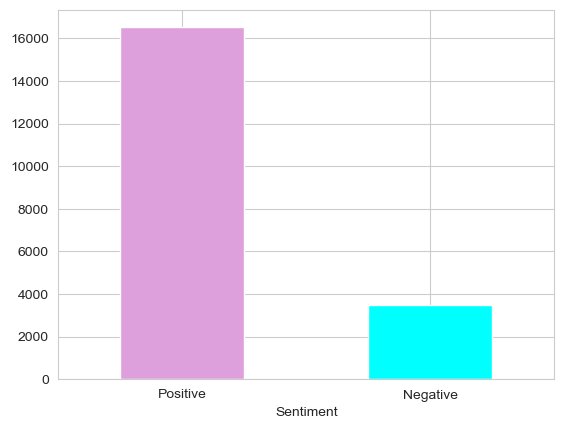

In [21]:
result = df4["Sentiment"].value_counts()

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

In [22]:
df4.groupby("Sentiment").count()

,post_text,tokens,polarity
Sentiment,,,
Negative,3480,3480,3480
Positive,16520,16520,16520


In [23]:
df4.groupby("polarity").max().head(5) 
# returns the tweets with maximum polarity i.e. most negative tweets

,post_text,tokens,Sentiment
polarity,,,
-1.000000,"wrong! said nsa &amp; cia, others convinces us...","[wrong, said, nsa, amp, cia, others, convinces...",Negative
-1.000000,@thebotanophile @jasonmillerindc @realdonaldtr...,"[thebotanophile, jasonmillerindc, realdonaldtr...",Negative
-0.976563,@the_newright everyone knows false news fromtn...,"[the_newright, everyone, knows, false, news, f...",Negative
-0.976562,exxonmobil helped defeat russia sanctions bill...,"[politicususa, joe, amp, mika, trump, putin, c...",Negative
-0.953674,really wan informed watch @cbsthismorning !!!!...,"[really, wan, informed, watch, cbsthismorning,...",Negative


Visualize the results

Text(0.5, 1.0, 'Polarity Distribution')

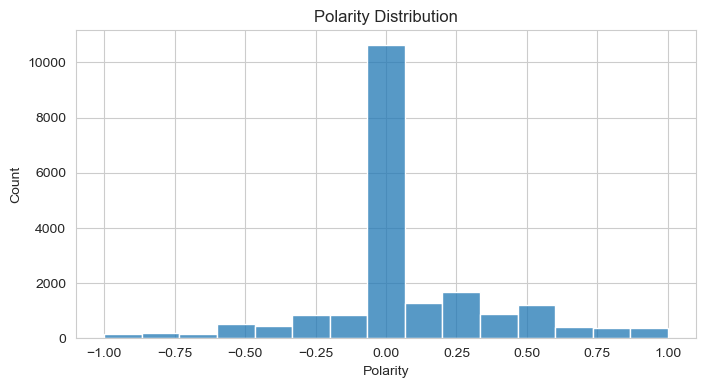

In [24]:
#Visualize distribution of polarity
plt.figure(figsize=(8,4))
sns.histplot(df4['polarity'], bins=15, kde=False)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')

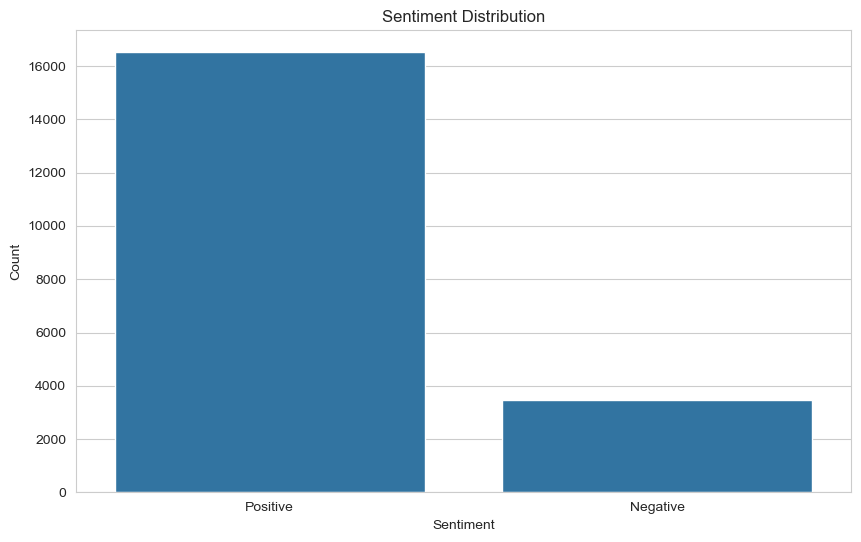

In [25]:
# Visualize distribution of sentiment
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=df4,order=df4['Sentiment'].value_counts().index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()